<a href="https://colab.research.google.com/github/Yogesh-ProITBridge/Time-series-Project/blob/main/prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install prophet

In [2]:
from prophet import Prophet

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import pandas as pd
gold_data = pd.read_csv("/content/drive/MyDrive/Time Series/gold_data.csv")

In [5]:
gold_data

,Date,Gold Price
0,31-08-2008,1190
1,30-08-2008,1188
2,29-08-2008,1186
3,30-09-2008,1350
4,29-09-2008,1317
...,...,...
5649,05-05-2024,7068
5650,04-05-2024,7068
5651,03-05-2024,7039
5652,02-05-2024,7069


In [6]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'], format='%d-%m-%Y')

In [7]:
gold_data['Year'] = gold_data['Date'].dt.year
gold_data['Month'] = gold_data['Date'].dt.month
gold_data['Day'] = gold_data['Date'].dt.day

In [8]:
gold_data.rename(columns={'Gold Price' : 'Gold_Price'}, inplace=True)

In [9]:
gold_data.dtypes

Date          datetime64[ns]
Gold_Price             int64
Year                   int32
Month                  int32
Day                    int32
dtype: object

In [10]:
gold_data

,Date,Gold_Price,Year,Month,Day
0,2008-08-31,1190,2008,8,31
1,2008-08-30,1188,2008,8,30
2,2008-08-29,1186,2008,8,29
3,2008-09-30,1350,2008,9,30
4,2008-09-29,1317,2008,9,29
...,...,...,...,...,...
5649,2024-05-05,7068,2024,5,5
5650,2024-05-04,7068,2024,5,4
5651,2024-05-03,7039,2024,5,3
5652,2024-05-02,7069,2024,5,2


In [11]:
df = gold_data[['Date', 'Gold_Price']].rename(columns={'Date': 'ds', 'Gold_Price':'y'})

In [12]:
model = Prophet()

In [13]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpos948y9j/tw2ycj8l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpos948y9j/yvhx2rly.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78828', 'data', 'file=/tmp/tmpos948y9j/tw2ycj8l.json', 'init=/tmp/tmpos948y9j/yvhx2rly.json', 'output', 'file=/tmp/tmpos948y9j/prophet_modelj8a4utct/prophet_model-20240531071819.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:18:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:18:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
future = model.make_future_dataframe(periods=365)

In [15]:
forecast = model.predict(future)

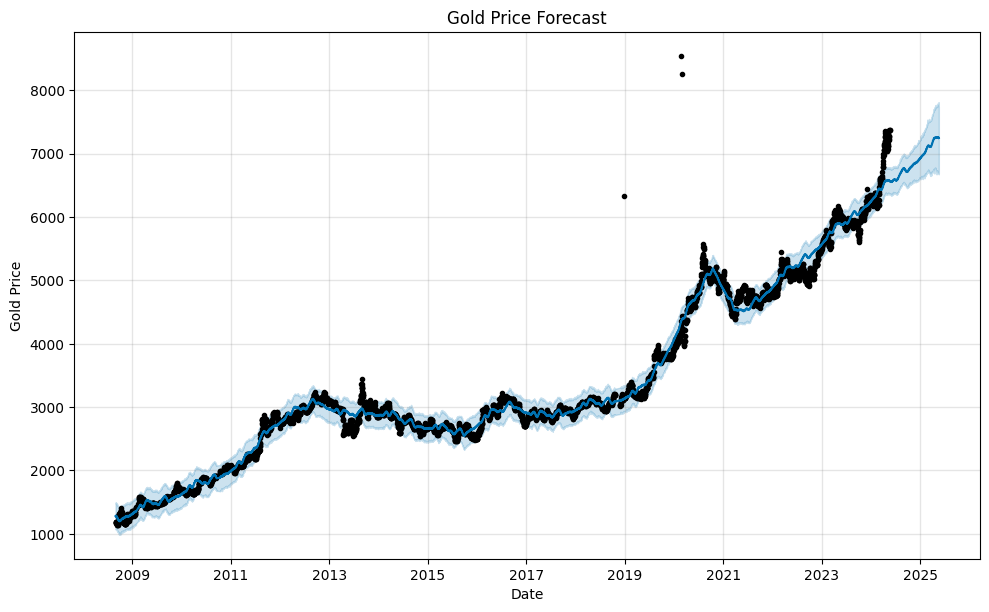

In [16]:
import matplotlib.pyplot as plt

fig = model.plot(forecast)
plt.title("Gold Price Forecast")
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.show()

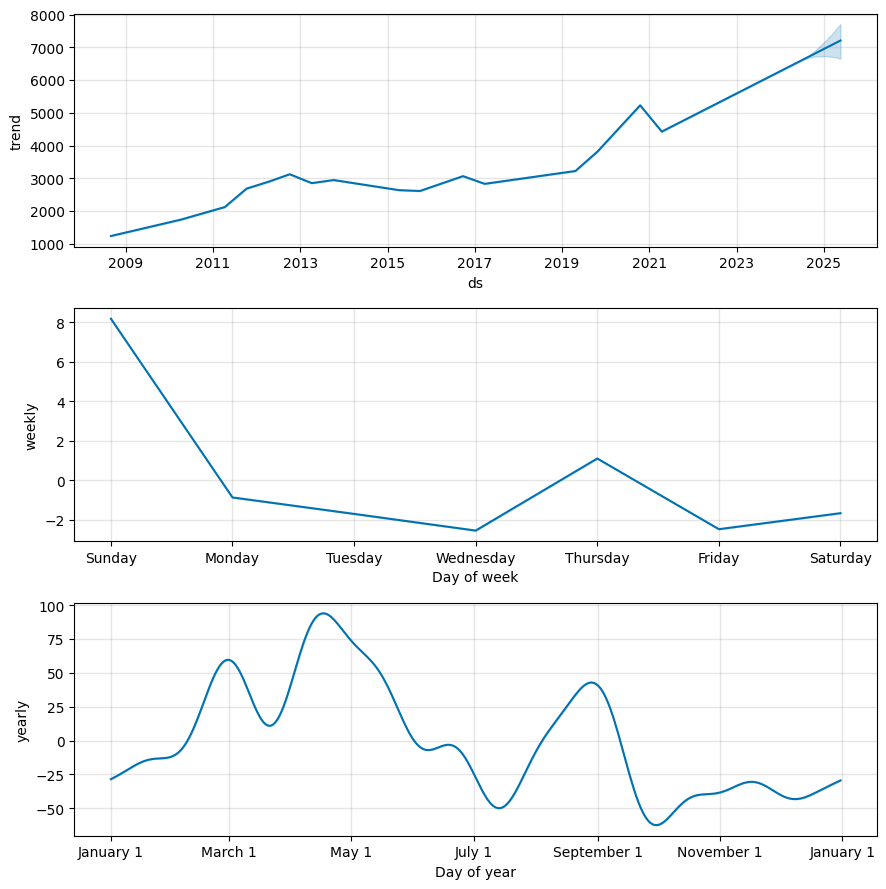

In [17]:
fig2 = model.plot_components(forecast)
plt.show()

In [19]:
specific_date = '2024-05-30'
future_specific_date = pd.DataFrame({'ds': [specific_date]})

forecast_specific_date = model.predict(future_specific_date)

# Print the forecast
print(forecast_specific_date[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

          ds         yhat   yhat_lower   yhat_upper
0 2024-05-30  6554.323792  6336.979009  6765.643422
